In [ ]:
!pip install pymoo

In [ ]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.util.remote import Remote

from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.operators.sampling.rnd import FloatRandomSampling,IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [ ]:


# Lista de criptomoedas
'''cryptos = [
    'AAPL', 'MSFT', 'AMZN', 'TSLA',
    'BRK-B', 'META', 'NVDA', 'JNJ'
]'''
cryptos = [
    'BTC-USD', 'ETH-USD','LTC-USD', 'ADA-USD',
    'DOT-USD', 'LINK-USD','SOL-USD',
    'TRX-USD'
]

# Dicionário para armazenar os DataFrames individuais
data = {}

for crypto in cryptos:
    df = yf.download(crypto, start='2010-01-01', end='2022-12-31')
    data[crypto] = np.log(df['Close'])  # Calcula o log do preço de fechamento

# Combina todos os DataFrames em um único DataFrame
df_combined = pd.concat(data, axis=1)  # Junta com MultiIndex (cripto, valor)
df_combined.columns = [crypto for crypto in cryptos]  # Ajusta os nomes das colunas

# Reseta o índice para transformar a data em uma coluna
df_combined.reset_index(inplace=True)
df_combined.rename(columns={'Date': 'date'}, inplace=True)

# Salva o DataFrame final em um arquivo CSV
df_combined.to_csv('cryptos_prices.csv', index=False)

print("Arquivo 'cryptos_prices.csv' criado com sucesso!")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Arquivo 'cryptos_prices.csv' criado com sucesso!


In [ ]:
df = df_combined.copy()
df.set_index('date', inplace=True)
df

,BTC-USD,ETH-USD,LTC-USD,ADA-USD,DOT-USD,LINK-USD,SOL-USD,TRX-USD
date,,,,,,,,
2014-09-17 00:00:00+00:00,6.125414,NaN,1.621080,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,6.050771,NaN,1.544415,NaN,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,5.978369,NaN,1.465052,NaN,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,6.013480,NaN,1.455457,NaN,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,5.988513,NaN,1.445959,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,9.736240,7.112307,4.258230,-1.326905,1.519961,1.798018,2.425388,-2.908601
2022-12-27 00:00:00+00:00,9.724192,7.100680,4.230446,-1.345652,1.499693,1.774821,2.405632,-2.916810
2022-12-28 00:00:00+00:00,9.714297,7.081697,4.194779,-1.392804,1.454527,1.736412,2.277873,-2.916090


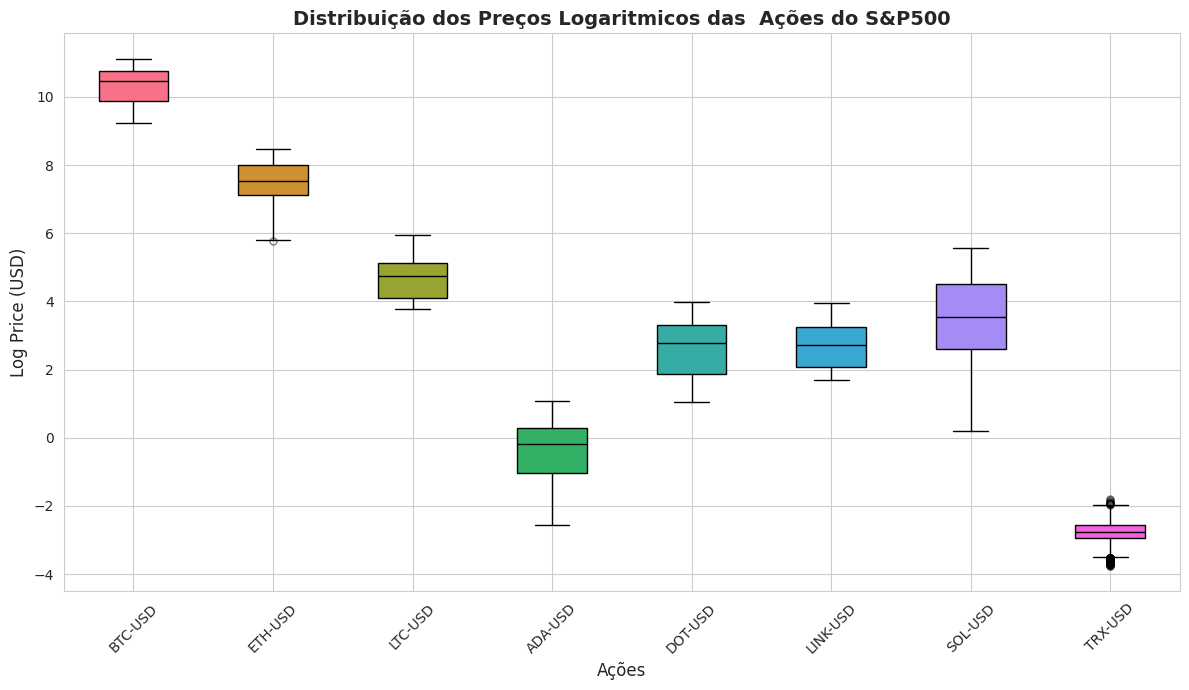

In [ ]:
# @title Cryptocurrency Price Distributions

import matplotlib.pyplot as plt
import seaborn as sns

# Remover linhas com valores NaN em qualquer uma das colunas
df_cleaned = df.dropna()

# Configurar o estilo do Seaborn para melhorar a aparência
sns.set_style("whitegrid")

# Criar a figura
plt.figure(figsize=(12, 7))

# Plotar os boxplots com cores personalizadas
box = plt.boxplot(
    df_cleaned,
    labels=cryptos,
    patch_artist=True,  # Necessário para cores preenchidas
    medianprops={'color': 'black'},
    flierprops={'marker': 'o', 'markersize': 5, 'color': 'red', 'alpha': 0.5},
)

# Personalizar as cores das caixas
colors = sns.color_palette("husl", len(box['boxes']))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Configurar os eixos e título
plt.xlabel('Ações', fontsize=12)
plt.ylabel('Log Price (USD)', fontsize=12)
plt.title('Distribuição dos Preços Logaritmicos das  Ações do S&P500', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot.png', format='png', dpi=300)
# Mostrar o gráfico
plt.show()



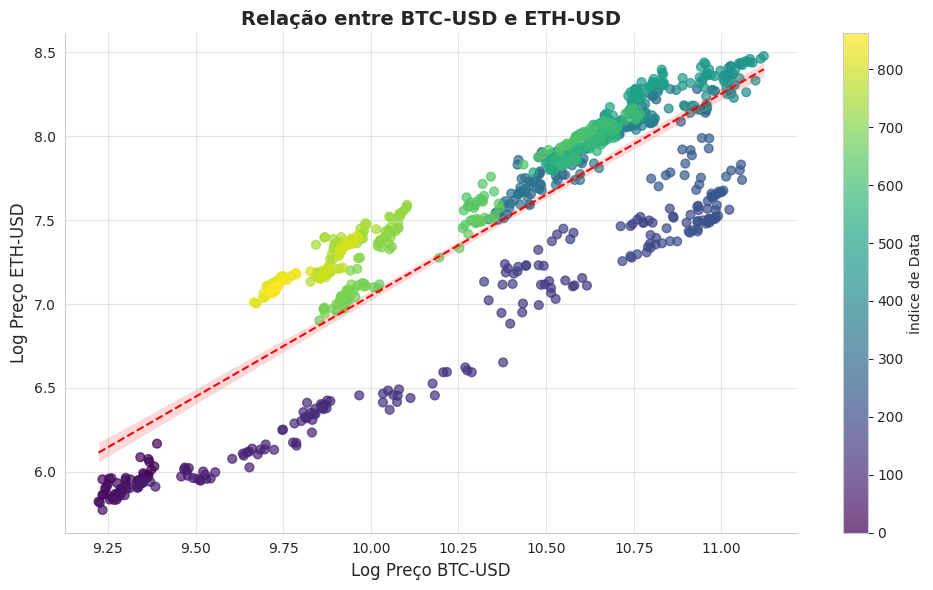

In [ ]:
# @title BTC-USD vs ETH-USD

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo do Seaborn
sns.set_style("whitegrid")

# Criar a figura
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_cleaned['BTC-USD'],
    df_cleaned['ETH-USD'],
    s=40,  # Tamanho dos pontos
    alpha=0.7,  # Transparência
    c=df_cleaned.index.to_series().factorize()[0],  # Cores baseadas no índice (ou data)
    cmap="viridis",  # Paleta de cores
)

# Adicionar uma linha de tendência para mostrar a relação
sns.regplot(
    x='BTC-USD',
    y='ETH-USD',
    data=df_cleaned,
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'linewidth': 1.5},
)

# Personalizar o gráfico
plt.title("Relação entre BTC-USD e ETH-USD", fontsize=14, fontweight='bold')
plt.xlabel("Log Preço BTC-USD", fontsize=12)
plt.ylabel("Log Preço ETH-USD", fontsize=12)
plt.colorbar(scatter, label="Índice de Data")
plt.grid(alpha=0.5)

# Ocultar bordas superiores e direitas
plt.gca().spines[['top', 'right']].set_visible(False)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [ ]:
df

,AAPL,MSFT,AMZN,TSLA,BRK-B,META,NVDA,JNJ
date,,,,,,,,
2010-01-04 00:00:00+00:00,2.033818,3.432373,1.901361,NaN,4.192983,NaN,-0.771649,4.169452
2010-01-05 00:00:00+00:00,2.035546,3.432696,1.907244,NaN,4.197803,NaN,-0.757152,4.157789
2010-01-06 00:00:00+00:00,2.019511,3.426540,1.888962,NaN,4.192680,NaN,-0.750776,4.165890
2010-01-07 00:00:00+00:00,2.017661,3.416086,1.871802,NaN,4.196600,NaN,-0.770568,4.158727
2010-01-08 00:00:00+00:00,2.024287,3.422959,1.898519,NaN,4.196299,NaN,-0.768410,4.162159
...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,4.881741,5.475333,4.445588,4.813403,5.725185,4.771024,2.721690,5.178858
2022-12-27 00:00:00+00:00,4.867765,5.467891,4.419322,4.692265,5.722113,4.761148,2.647663,5.178576
2022-12-28 00:00:00+00:00,4.836599,5.457584,4.404522,4.724818,5.715151,4.750309,2.641625,5.174227


In [ ]:
returns = df.diff().dropna(how="all") # calcula os retornos (pct_change) para todas as colunas, exceto NaN
mu = (np.exp(returns)).prod() ** (252 / returns.count()) - 1 # retorno medio anuais (252 dias)

In [ ]:
cov = np.exp(returns).cov() * 252 # calcula a matriz de covariancia dos retornos
mu, cov = mu.to_numpy(), cov.to_numpy()
labels = df.columns
pd.DataFrame(cov)

,0,1,2,3,4,5,6,7
0,0.370424,0.393522,0.360373,0.410541,0.400862,0.389252,0.330682,0.410981
1,0.393522,0.646426,0.572381,0.568391,0.591806,0.573819,0.549667,0.535614
2,0.360373,0.572381,0.812876,0.585201,0.597902,0.544260,0.493807,0.538501
3,0.410541,0.568391,0.585201,1.404483,0.635498,0.642435,0.553918,0.715721
4,0.400862,0.591806,0.597902,0.635498,1.159836,0.761094,0.680352,0.515379
5,0.389252,0.573819,0.544260,0.642435,0.761094,1.296110,0.663690,0.626288
6,0.330682,0.549667,0.493807,0.553918,0.680352,0.663690,1.586110,0.401916
7,0.410981,0.535614,0.538501,0.715721,0.515379,0.626288,0.401916,1.533755


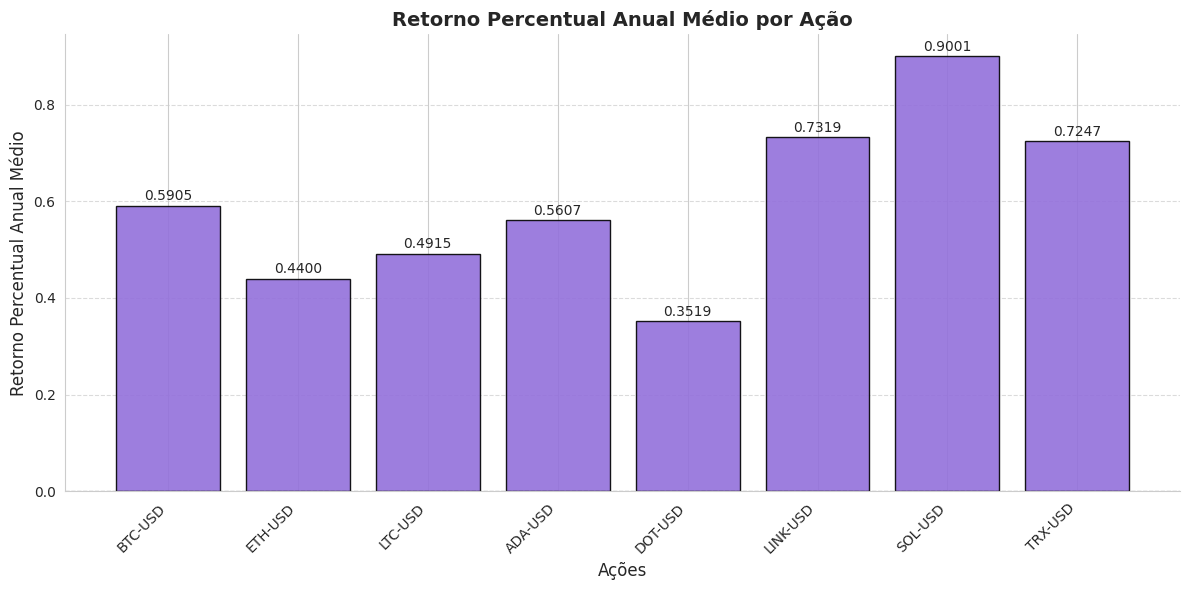

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraindo os desvios padrão da matriz de covariância
std_devs = np.sqrt(mu)  # Extrai a diagonal e calcula a raiz quadrada

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 6))
k = np.arange(len(std_devs))
bars = ax.bar(k, std_devs, color='mediumpurple', edgecolor='black', alpha=0.9)

# Adicionar valores no topo de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{height:.4f}",
            ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
ax.set_xticks(k)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)  # Ajusta os rótulos do eixo x
ax.set_title('Retorno Percentual Anual Médio por Ação', fontsize=14, fontweight='bold')  # Título
ax.set_ylabel('Retorno Percentual Anual Médio', fontsize=12)  # Rótulo do eixo y
ax.set_xlabel('Ações', fontsize=12)  # Rótulo do eixo x
ax.spines[['top', 'right']].set_visible(False)  # Remove bordas superiores e laterais
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas de grade horizontais
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Linha horizontal no 0%
plt.savefig('return_stocks.png', format='png', dpi=300)
# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

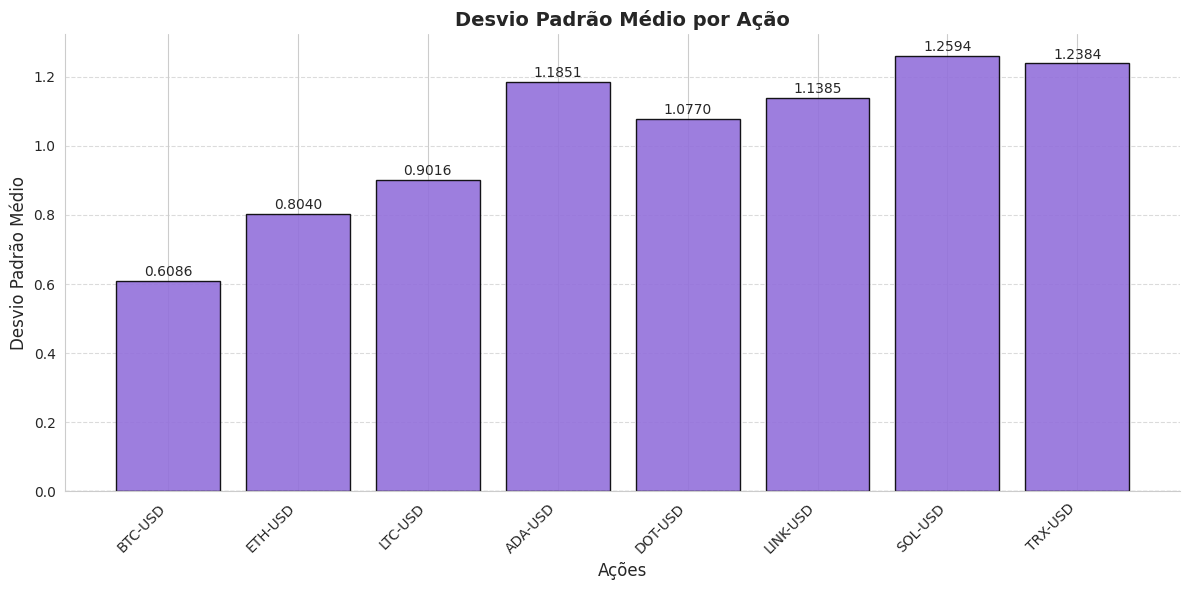

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraindo os desvios padrão da matriz de covariância
std_devs = np.sqrt(np.diag(cov))  # Extrai a diagonal e calcula a raiz quadrada

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 6))
k = np.arange(len(std_devs))
bars = ax.bar(k, std_devs, color='mediumpurple', edgecolor='black', alpha=0.9)

# Adicionar valores no topo de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{height:.4f}",
            ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
ax.set_xticks(k)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)  # Ajusta os rótulos do eixo x
ax.set_title('Desvio Padrão Médio por Ação', fontsize=14, fontweight='bold')  # Título
ax.set_ylabel('Desvio Padrão Médio', fontsize=12)  # Rótulo do eixo y
ax.set_xlabel('Ações', fontsize=12)  # Rótulo do eixo x
ax.spines[['top', 'right']].set_visible(False)  # Remove bordas superiores e laterais
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas de grade horizontais
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Linha horizontal no 0%
plt.savefig('std_stock.png', format='png', dpi=300)
# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


DONE


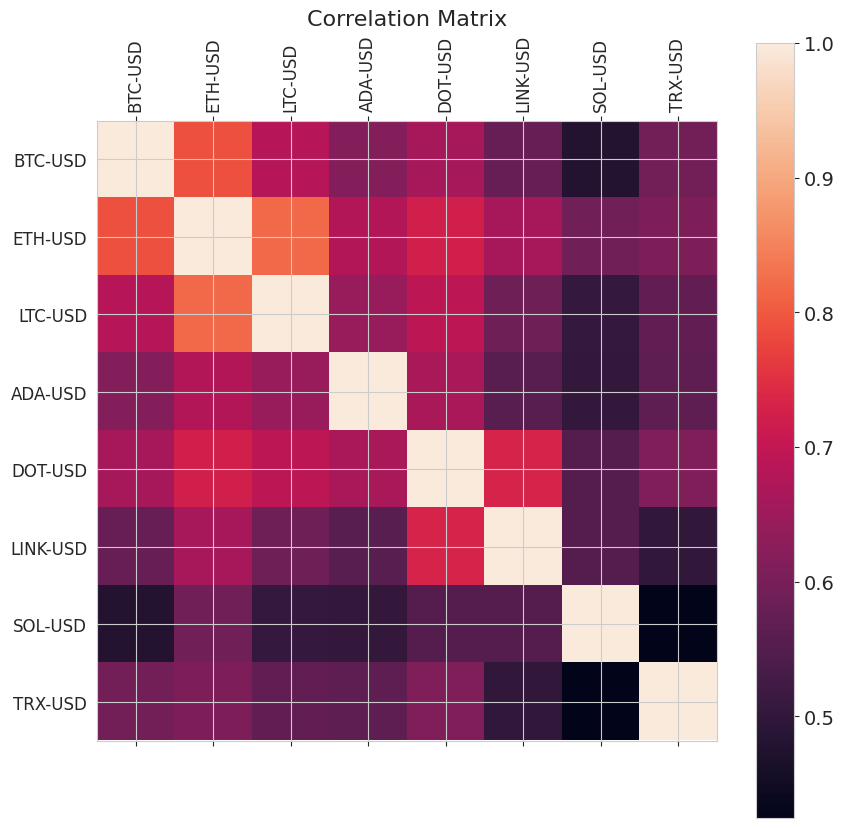

In [ ]:
# Matriz de Correlação de Retornos
f = plt.figure(figsize=(10, 10))
plt.matshow(returns.corr(), fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.savefig('correlatio_matrix_stocks.png', format='png', dpi=300)
print("DONE")

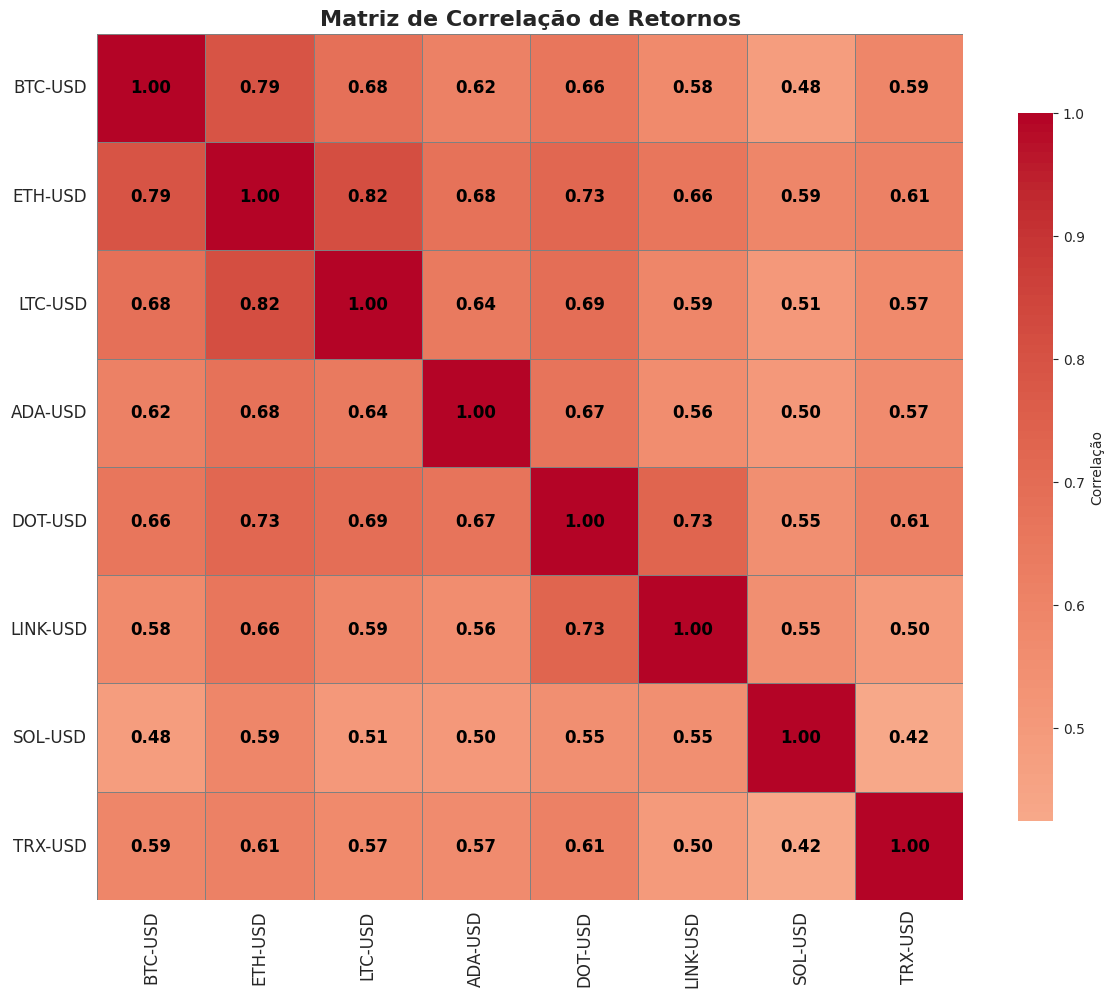

DONE


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de Correlação de Retornos
corr_matrix = returns.corr()

# Criando o gráfico
f = plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='gray', cbar_kws={'shrink': 0.8, 'label': 'Correlação'},
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'}, xticklabels=labels,
            yticklabels=labels, square=True)

# Ajustando rótulos
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Adicionando título
plt.title('Matriz de Correlação de Retornos', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('correlatio_matrix_cryp.png', format='png', dpi=300)
plt.show()

print("DONE")

In [ ]:
# Calculando a correlação média de cada ativo com os outros
mean_correlations = corr_matrix.mean()

# Exibindo a correlação média de cada ativo com os outros
for ticker, mean_corr in mean_correlations.items():
    print(f'A correlação média de {ticker} com os outros ativos é: {mean_corr:.2f}')


A correlação média de AAPL com os outros ativos é: 0.53
A correlação média de MSFT com os outros ativos é: 0.57
A correlação média de AMZN com os outros ativos é: 0.51
A correlação média de TSLA com os outros ativos é: 0.40
A correlação média de BRK-B com os outros ativos é: 0.50
A correlação média de META com os outros ativos é: 0.46
A correlação média de NVDA com os outros ativos é: 0.51
A correlação média de JNJ com os outros ativos é: 0.41


In [ ]:
from pymoo.core.problem import ElementwiseProblem

class PortfolioProblemGA(ElementwiseProblem):
    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        # Problema com apenas 1 objetivo. Minimizar a função objetivo _evaluate que é sharpe * -1
        super().__init__(n_var=len(df.columns), n_obj=1, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu # @ é multiplicação de matriz
        exp_risk = np.sqrt(x.T @ self.cov @ x)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = -sharpe #[exp_risk, -exp_return]
        # importante : Note o sinal negativo para Sharpe (queremos maximizar Sharpe), mas o pymoo esperar minimizar
        #
        out["risk_return"] = [exp_risk, -exp_return]

In [ ]:
from pymoo.core.repair import Repair

class PortfolioRepair(Repair): # Elimina pesos muito baixos (menores que 0.001)
    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0 # Seta valores menores que 0.001 (1e-3) para zero
        X=X / X.sum(axis=1, keepdims=True) # normaliza o portfolio (somatorio dos pesos igual a 1)
        return X

In [ ]:
# Solução com GA
problem = PortfolioProblemGA(mu, cov)


algorithm = GA(
    pop_size=100,
    crossover=SBX(prob=1.0, eta=3.0, vtype=float, repair=PortfolioRepair()), # Simulated Binary Crossover, hyperparameters: prob of crossover, eta - parameter of crossover distribution
    mutation=PM(prob=1.0, eta=3.0, vtype=float, repair=PortfolioRepair()),
    eliminate_duplicates=True)

res = minimize(problem, # observe que estamos minimizando
               algorithm,
               termination=('n_gen', 1000),# Criterio de termino: numero de geracoes!
               seed=1,
               verbose=False)

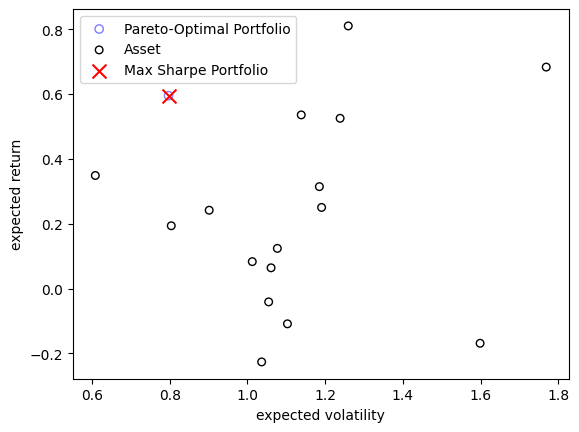

Allocation With Best Sharpe
SOL-USD = 0.40623
BTC-USD = 0.35191
TRX-USD = 0.11324
DOGE-USD = 0.10016
LINK-USD = 0.02846
ETH-USD = 0.00000
XRP-USD = 0.00000
LTC-USD = 0.00000
BCH-USD = 0.00000
ADA-USD = 0.00000
DOT-USD = 0.00000
XLM-USD = 0.00000
AVAX-USD = 0.00000
FIL-USD = 0.00000
XTZ-USD = 0.00000
EOS-USD = 0.00000


In [ ]:
# Apresentação dos Resultados
#res.X: Design space values are
#res.F: Objective spaces values

X, F, sharpe = res.opt.get("X", "risk_return", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5, mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

import operator

allocation = {name: w for name, w in zip(df.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} = {w:.5f}")

In [ ]:
from pymoo.core.problem import ElementwiseProblem

class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.01, **kwargs):
        # n_var é o numero de variáveis alvo(no caso número de ativos)
        # n_obj problema tem dois objetivos simultaneos de mimizacao: [exp_risk, -exp_return]
        super().__init__(n_var=len(df.columns), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate
# [0.6 , 0.4, 0...0] * [ r1, r2, r3.,.....r4]=
# 0.6*r1+0.4*r2
    def _evaluate(self, x, out, *args, **kwargs): # x é um individuo = alocaçao!!
        exp_return = x @ self.mu # @ é multiplicação de matriz
        exp_risk = np.sqrt(x.T @ self.cov @ x)  # x.T é a transposta de X
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe


from pymoo.core.repair import Repair

class PortfolioRepair(Repair): # Elimina pesos muito baixos (menores que 0.001) e normaliza - igual ao caso com GA
    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0 # Seta valores menores que 0.001 (1e-3) para zero
        X=X / X.sum(axis=1, keepdims=True) # normaliza o portfolio (somatorio dos pesos igual a 1)
        return X


from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.optimize import minimize

problem = PortfolioProblem(mu, cov)

algorithm = SMSEMOA(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

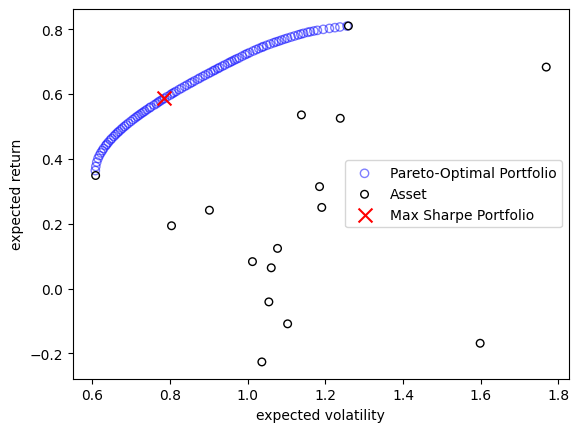

Allocation With Best Sharpe
SOL-USD = 0.39366
BTC-USD = 0.37777
TRX-USD = 0.10413
DOGE-USD = 0.09799
LINK-USD = 0.02646
ETH-USD = 0.00000
XRP-USD = 0.00000
LTC-USD = 0.00000
BCH-USD = 0.00000
ADA-USD = 0.00000
DOT-USD = 0.00000
XLM-USD = 0.00000
AVAX-USD = 0.00000
FIL-USD = 0.00000
XTZ-USD = 0.00000
EOS-USD = 0.00000


In [ ]:
# Apresentação dos Resultados
X, F, sharpe = res.opt.get("X", "F", "sharpe") # o SMSEMOA retorna em F a fronteira de pareto
F = F * [1, -1] # F=[exp_risk, -exp_return] *[1,-1]=[exp_risk, exp_return]
max_sharpe = sharpe.argmax()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5, mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

import operator

allocation = {name: w for name, w in zip(df.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} = {w:.5f}")